# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [4]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [10]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [11]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [12]:
print(boston.target.shape)

(506,)


In [13]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

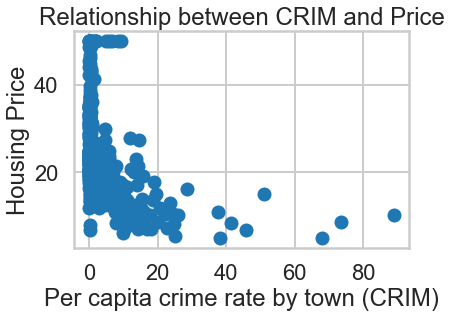

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [13]:
# your turn: describe relationship


The relation between crime rate and price seems to negative and non-linear. The housing price reduces as the per capita crime rate by town increases. This is to be expected as people would not pay high prices to unsafe localities.<br> A few observations which have an increased crime rate but still highest prices can be considered as outliers. These are obervations around x = 10 and y = 50.

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*


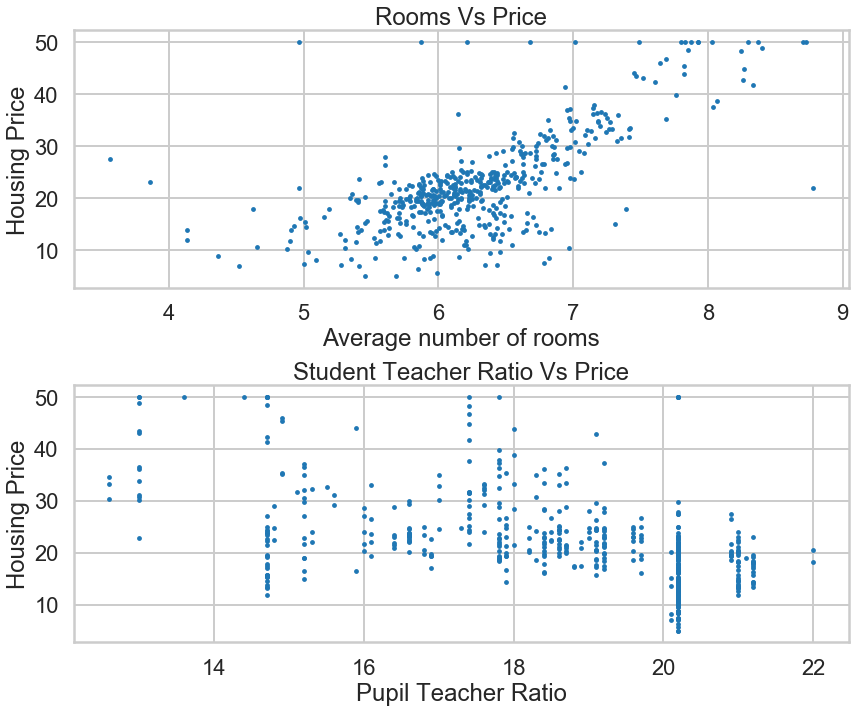

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1, figsize=(12, 10))

ax1.scatter(bos.RM, bos.PRICE, s=8)
ax1.set(title='Rooms Vs Price', xlabel='Average number of rooms', ylabel='Housing Price')

ax2.scatter(bos.PTRATIO, bos.PRICE, s=8)
ax2.set(title='Student Teacher Ratio Vs Price', xlabel='Pupil Teacher Ratio', ylabel='Housing Price')
plt.tight_layout()
plt.show()


Price VS Average number of rooms:<br>
The relation between Average number of rooms and House Pricing looks Linear with a positive correlation. It is a continuous distribution. The spread is high. And there are multiple outliers which could be attributed to be affected by other variables such as crime rates or localities.

Price VS Pupil Teacher Ratio: <br>
House pricing also seems to be following a linear negative correlation with Pupil Teacher Ratio. It is a discrete distribution with the student pupil ratio being a discrete range. The slope seems is much smaller in magnitude and the the spread is quite high.<br>
Another way of looking at it could be a loosely bimodal distribution.

In [16]:
# your turn: create some other scatter plots


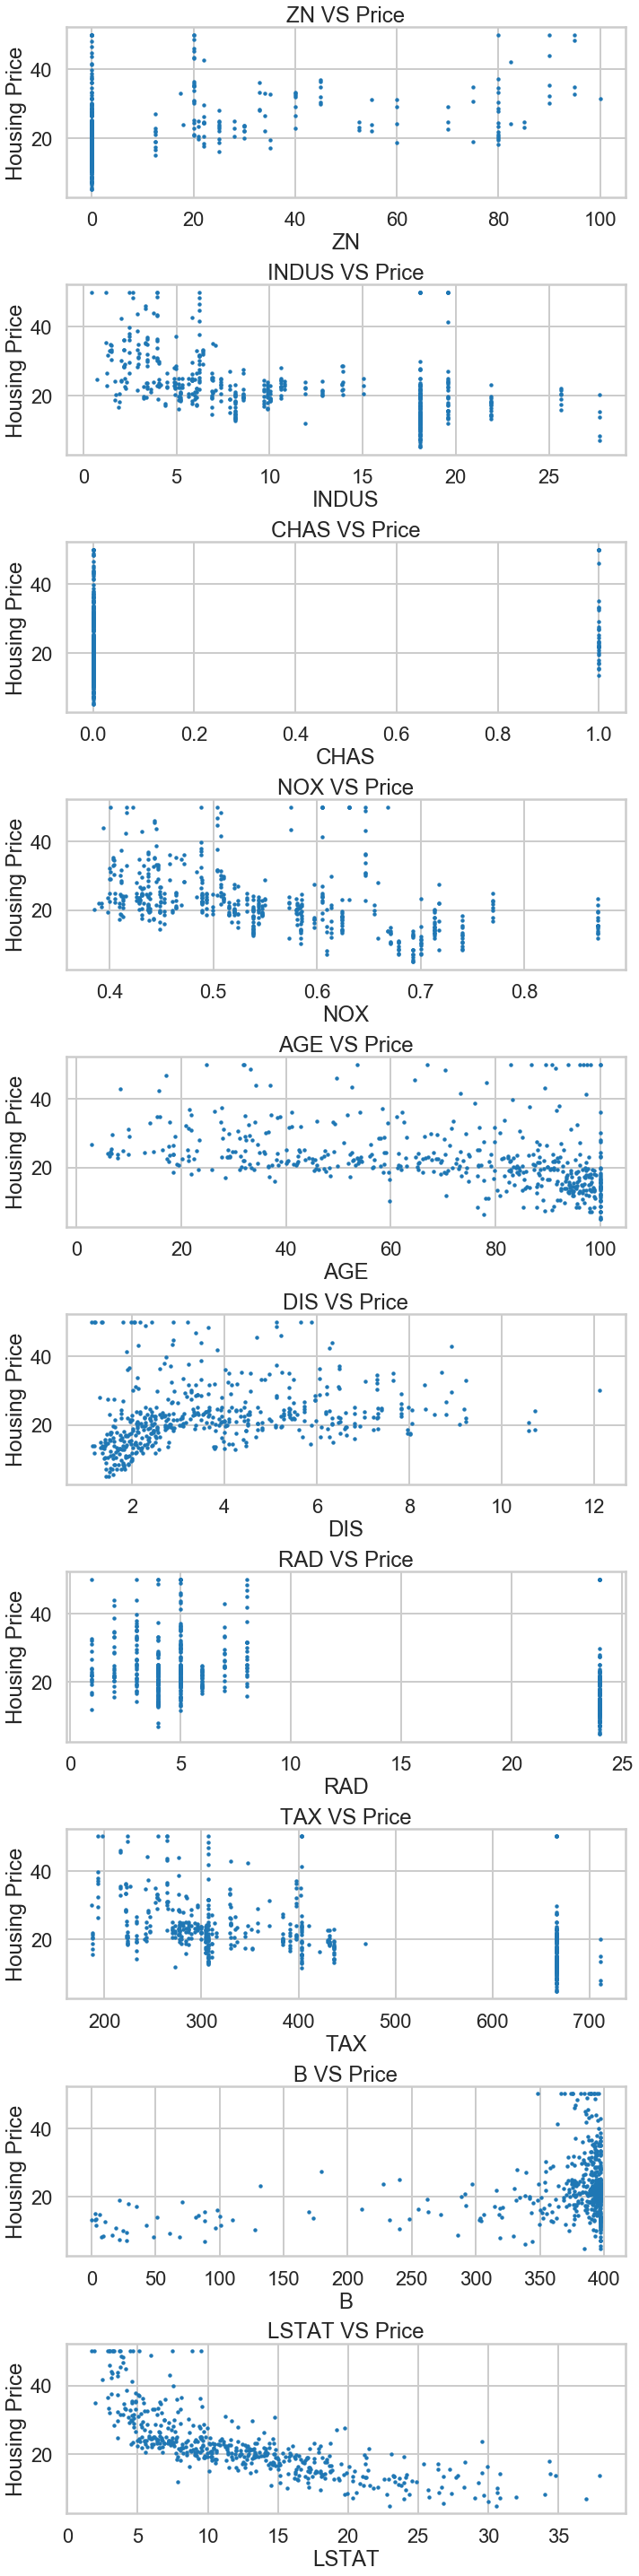

In [17]:
a = boston.feature_names.tolist()
b = ['CRIM', 'RM', 'PTRATIO']
other_features = [name for name in a if name not in b]

fig, axs = plt.subplots(nrows=len(other_features), ncols=1, figsize = (10, 40))

for i in range(len(other_features)):
    axs[i].scatter(bos[other_features[i]], bos.PRICE, s=6)
    axs[i].set(title=other_features[i]+' VS Price', xlabel=other_features[i], ylabel='Housing Price')

plt.tight_layout()
plt.show()

#### First Impressions from scatter plots:

* 1. ZN vs PRICE: <br>
ZN depicts the proportion of large plots (over 25000 sq ft) per suburb or town in Boston.<br>
The plot of ZN vs Price indicates that as the proportion of large plot sizes in a locality increases, the price of houses also increase. The relationship looks linear. This is to be expected because bigger plots means higher price on account of increased data.<p>

* 2. INDUS vs PRICE: <br>
INDUS column depicts the proportion of land allocated for industrial use per locality.<br>
The plot shows a linear, negative correlation between INDUS and PRICE which is to be expected as higher concentration of industries in a town can lower residential prices. We can see more randomness before the threshold of 15% industrial area proportion, beyond which, as the proportion of industrial land increases, the prices subsequently decline in a seemingly linear fashion<p>

* 3. CHAS vs PRICE: <br>
The CHAS column depicts in binary response if the town or locality is located in the proximmity of a river.
Although no apparent co-relation is observed of the CHAS variable with PRICE. One distinct observation is that the minimum avergage housing prices for towns near rivers are higher that towns that are not in the proximity of rivers.<p>

* 4. NOX vs PRICE: <br>
The relationship looks linear and negative. The prices dips from NOX levels of 0.3 to 0.7 and increases back up again from 0.7 to 0.8. These could be industrial towns which have seen long duration settlements and have gradually converted from residential to industrial.<p>

* 5. AGE vs PRICE: <br>
AGE gives the proportion of houses built before 1940 per town. AGE also follows a negative and linear correlation with price. We can observe that a large number of towns have high proportions of old constructed properties. We also see an increase in outliers as the 'AGE' variable increases. This might be attributed to old houses belonging to cities that have historical significance.<p>

* 6. DIS vs PRICE: <br>
DIS depicts the proximity to the five Boston employment centers. The relationship looks positively linear. This could be explained by<br>
a) Smaller sizes of properties near employment centers<br>
b) High Industrial complexes and NOX air content near the employment centers<br>
c) Sound pollution, population preference etc.<p>

* 7. RAD vs PRICE: <br>
RAD is an index which depicts the accessibility to Radial Highways. The relationship looks random at first. Using a histogram we can see that the largest segment of towns have an index value of 5. A large number of towns also have a very high RAD index value. There prices generally tend to be lower.

* 8. TAX vs PRICE: <br>
Linear and negative correlation. Higher the property tax rates, lower the prices of the locality. The plot does shown high spread between the variables. A segment of properties have extremely high tax (visible to the right) and have significantly low housing prices. These may correspond to towns with high Industrial area proportion.<p>

* 9. B vs PRICE: <br>
This scatter plot does not yield any insight. Looks random. May have to look through other transformations to gather any correlational insight.<p>

* 10. LSTAT vs PRICE: <br>
LSTAT represents the percentage of homeowners in the neighborhood considered "lower class" (working poor). The relationship with price looks like exponential decay. The prices of houses reduce rapidly as the proportion of lower class population increases.

Out of all the other variables, DIS and LSTAT appear to be the most influential varibales. The slopes are compariteively higher than other variables and there is a distinct trend that can be seen

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

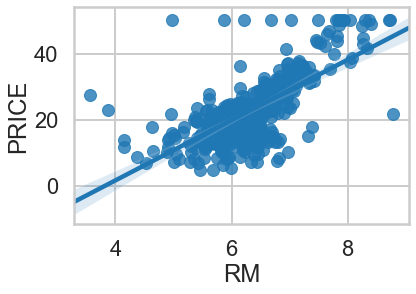

In [18]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


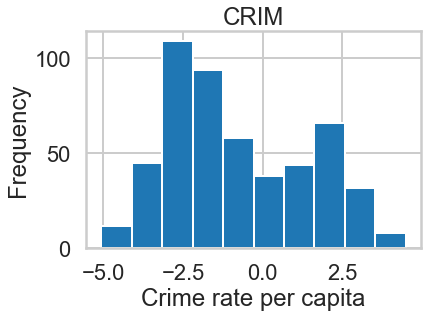

In [19]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

In [20]:
#your turn


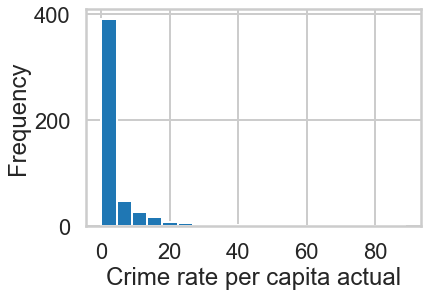

In [21]:
_ = plt.hist(bos.CRIM, bins=20)
_ = plt.xlabel("Crime rate per capita actual")
_ = plt.ylabel("Frequency")
plt.show()

The distribution that CRIM variable shows is exponential in nature. An exponential distribution that is highly skewed and wont be useful as it wont represent 'linearly' the variation in y with linear variation in X_feature in our model. Taking the log transformation normalizes the data i.e. brings it into a near-normal form and spaces the data out.<br>
What we notice after the transformations is the bimodal nature of the distribution, with peaks at CRIM values of roughly e^-3 and e^2. In the simple plot, we could observe only a single bin with maximum frequency of 400.

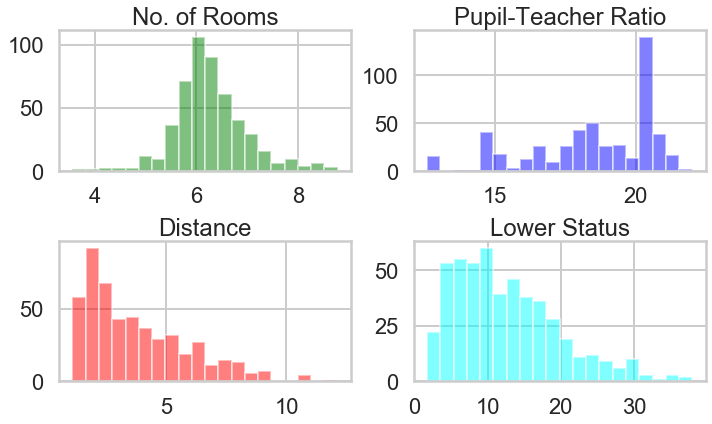

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axs[0,0].hist(bos.RM, bins=20, color='green', alpha=0.5)
axs[0,0].set(title='No. of Rooms')
axs[0,1].hist(bos.PTRATIO, bins=20, color='blue', alpha=0.5)
axs[0,1].set(title='Pupil-Teacher Ratio')
axs[1,0].hist(bos.DIS, bins=20, color='red', alpha=0.5)
axs[1,0].set(title='Distance')
axs[1,1].hist(bos.LSTAT, bins=20, color='cyan', alpha=0.5)
axs[1,1].set(title='Lower Status')
plt.tight_layout()
plt.show()


## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [2]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [24]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           2.49e-74
Time:                        21:01:20   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

In [25]:
# your turn

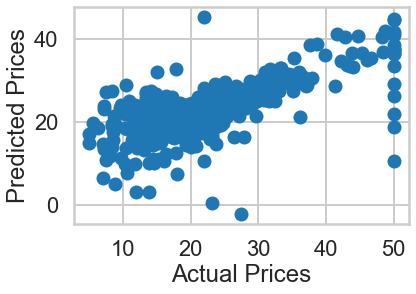

In [26]:
_ = plt.scatter(bos.PRICE, m.fittedvalues)
_ = plt.xlabel('Actual Prices')
_ = plt.ylabel('Predicted Prices')
plt.show()

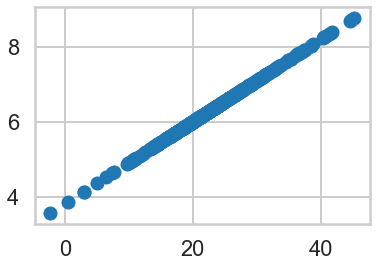

In [27]:
_ = plt.scatter(m.fittedvalues, bos.RM)

What is interesting is that the scatter plot between fittedvalues and PRICE looks completely similar to the scatter plot between bos.RM and bos.PRICE. I was expecting more of a straight line between the fitted values and PRICE.<br>
This clearly depicts that creating our regression model only on 'No of Rooms' to predict 'Price' is not the right approach as it does not truly represent the variability in the PRICE observations. We need to consider other predictor variables.<br> We can also observe the same from the R^2 values of the model.<br>
We also see a ceiling effect with the predicted values. As the actual prices hit the limit of 50, the predicted values tend to drop.

### Fitting Linear Regression using `sklearn`


In [28]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [29]:
# Look inside lm object 
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [30]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [31]:
# your turn

Exercise 1:

I would recommend <b>NOT</b> having an intercept term. The reason for this is that as we have seen in the linear regression fit between 'No. of rooms' and 'Price', that 'No. of Rooms' is a statistically significant predictor of Price.<br>
Logic stands to reason that if there are no rooms in a house (suggesting that the area of the house is equal to zero), then the price should also be zero. While this may not be the case for any other feature, for RM, this should be true.

In [32]:
# Changing the linear regression to not consider the intercept term

#lm = LinearRegression(fit_intercept=False)
#lm

Exercise: 2

In a linear regression model being optimized by an OLS algorithm, it is required that the residuals should meet the following assumptions:

1. They are independent of each other (independent)
2. They have constant variance along the range of predictor variables (identical / drawn from the same distribution)
3. They are normally distributed (normal)

These assumptions of i.i.d and normality are necessary to ensure that the coefficients (betas) provided by the OLS corresponds to the maximum likihood estimators.

If we say that the residuals are normally distributed, it holds that they are independent and identical because:
1. A normal distribution is probability distribution for a real valued random variable (independent)
2. Since all residuals are assumed to belong from the same normal distribution, it means they are also identical (constant variance).

Exercise 3:

False. It is not neccessary that to use linear regression the response variable has to be normally distributed.
Regression analysis concerns itself with the <b>conditional distribution</b> of the response vector.
However, with the assumption of normality of the residuals, we come to a conclusion that the conditional distribution of Y given 'condition' or the matrix X, is normally ditributed.
This can also be derived as below:

Yi|x = E[ Yi |x ] + ei

where e~N(0,sigma2).

E[Yi|x] = Mui -> fixed (despite being conditional mean)-> non-random

Yi|x = Mui + ei -> This implies conditional normality of the response vector

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [33]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [34]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [35]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [36]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [37]:
# your turn


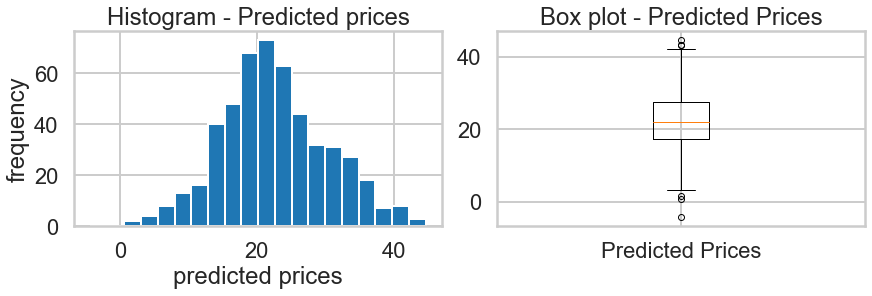

Mean - Predicted prices: 22.53
Standard dev - Predicted prices:  7.91
IQR range - Predicted prices:  [17.44574002 22.11865255 27.41002154]


In [38]:
#Exercise 1

predicted_prices = lm.predict(X)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols= 2, figsize=(12,4), constrained_layout=True)
ax1.hist(predicted_prices, bins=20)
ax1.set(title='Histogram - Predicted prices' ,xlabel='predicted prices', ylabel='frequency')
ax2.boxplot(predicted_prices)
ax2.set(title='Box plot - Predicted Prices', xticklabels=['Predicted Prices'])
plt.show()

mean_pp = np.mean(predicted_prices)
std_pp = np.std(predicted_prices)
percentiles_pp = np.percentile(predicted_prices, [25,50,75])

print('Mean - Predicted prices: %5.2f'%(mean_pp))
print('Standard dev - Predicted prices: %5.2f'%(std_pp))
print('IQR range - Predicted prices: ',(percentiles_pp))

The histogram looks normally distributed with a slight positive skew.<br>
The mean and median fall at a value of about 22 with a standard deviation of around 8.<br>
We can see outliers in the box plot. We see an outlier with a negative value for price. That is definitely something that needs to be looked at.

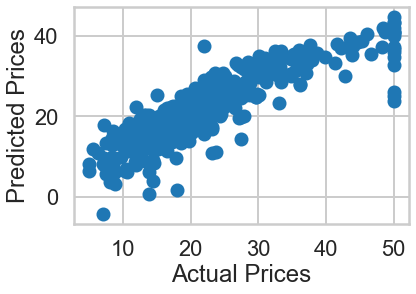

In [39]:
#Exercise 2

_ = plt.scatter(bos.PRICE, predicted_prices)
_ = plt.xlabel('Actual Prices')
_ = plt.ylabel('Predicted Prices')
plt.show()

We see the ceiling effect even after considering all the variables for our model.

Exercise 3:

Below table lists differences observed between statsmodels and sklearn.<br>
Points 1 to 4 were observed. Points 5 and 6 have been listed from research on the internet

statsmodels | sklearn
--- | --- 
Works great with dataframes | Need to convert dataframes into target and predictor arrays
Natural syntax for picking and choosing predictor variables | Need to generate predictor arrays every time
Detailed summary provided upon fitting the model to the data | No such summary provided
Trickier syntax overall to grasp | Standard Repeatable syntax for all kinds of models (fit & predict)
Slower performance that sklearn | Faster performance than statsmodels esp for 1000+ observations
Two options for solution in the linear regression - OLS &  Moore-Penrose pseudoinverse | Only OLS available

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [40]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [41]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

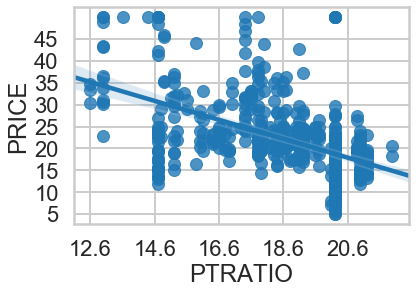

In [99]:
sns.regplot(bos.PTRATIO, bos.PRICE)
_=plt.yticks(np.arange(min(bos.PRICE), max(bos.PRICE), 5))
_=plt.xticks(np.arange(min(bos.PTRATIO), max(bos.PTRATIO), 2))

In [141]:
# your turn

ptratio = bos.PTRATIO.values.reshape(-1,1)
lm.fit(ptratio, bos.PRICE)
R2 = lm.score(ptratio, bos.PRICE)
print(R2)
print(lm.coef_[0])

0.257847318009223
-2.1571752960609656


In [142]:
from statsmodels.formula.api import ols
lm2 = ols('PRICE ~ PTRATIO',bos).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           1.61e-34
Time:                        18:57:17   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

In [143]:
fstat = R2*(bos.shape[0]-2)/(1-R2)
print(fstat)

175.10554287569548


<b>Interpretation of R2 value: </b><br>
The low value of R squared tells us that the variance in PRICE is not well explained by the the variance in PTRATIO. The variation in PRICE is only explained by about 26% by PTRATIO. Hence PTRATIO used alone is not a good predictor of PRICE. <br><br>

<b>Interpretation of F statistic value:</b><br>
The high value of f statistic tells us that the model that we have fit between PTRATIO and PRICE is statistically significant. Meaning that the coefficients of the linear regression is not=0 and that PTRATIO does have a linear effect on PRICE.<br><br>

<b>Correlation between F-Statistic and t-statistic of the coeff:</b><br>
The higher the value of the F-statistic, the higher should be the magnitude of the t-value of the coeffient (for a simple model). This is because, if the F-statisitic is higher, it means the the model is significant. The same goes of the t-statistic of the coefficient, the higher in magnitude (depending on the whether the slope is positive of negative) it is, the more significant the result.

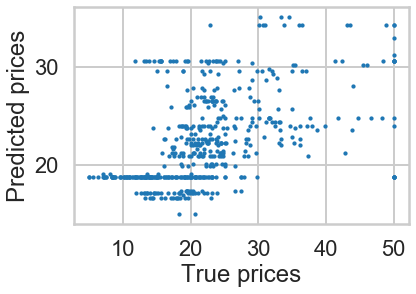

In [144]:
pred_price = lm.predict(ptratio)
_ = plt.scatter(bos.PRICE, pred_price, s=5)
_ = plt.xlabel('True prices')
_ = plt.ylabel('Predicted prices')
plt.show()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [14]:
# your turn
lm3 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           6.15e-98
Time:                        20:37:45   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

<b>Answer</b><br>
Looking at the F statistic and the pvalue for F-statstic, we can interpret that the model is statistically significant. That at least on of the predictor variables has an non zero coefficient.<br><br>
The R squared value of 0.594 tells us that almost 60% of the variance in the PRICE is explained by these three predictor variables namely CRIM, RM, PTRATIO.<br><br>
Looking at the t-statistics and the P values for the individual predictor variables, it looks like all three of them are significant predictors of the PRICE.<br>
CRIM shows a negative linear relationship with PRICE with a slope of -0.205.<br>
RM shows a positive linear relationship with the increase of 7.38K per room. <br>
PTRATIO shows a negative linear relationship with the prices falling slightly above 1K for every point increase in per capita crime.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [110]:
lm4 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT',bos).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     268.0
Date:                Sun, 14 Feb 2021   Prob (F-statistic):          5.84e-123
Time:                        16:36:10   Log-Likelihood:                -1550.8
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9233      3.976      4.257      0.0

In [128]:
X1 = bos[['CRIM', 'RM', 'PTRATIO']].values
X2 = bos[['CRIM', 'RM', 'PTRATIO', 'LSTAT']].values

lm_x1 = LinearRegression()
lm_x2 = LinearRegression()
lm_x1.fit(X1, bos.PRICE)
lm_x2.fit(X2, bos.PRICE)

y_pred1 = lm_x1.predict(X1)
y_pred2 = lm_x2.predict(X2)

RSS_1 = np.sum((bos.PRICE - y_pred1)**2)
RSS_2 = np.sum((bos.PRICE - y_pred2)**2)
DF1 = X1.shape[0]-X1.shape[1] - 1
DF2 = X2.shape[0]-X2.shape[1] - 1

Fstat_compare = ((RSS_1 - RSS_2)/(DF1 - DF2))/(RSS_2/DF2)
print('F statistic comparing the two models: ', Fstat_compare)

F statistic comparing the two models:  137.08517689561614


Adding the variable LSTAT to CRIM, RM and PTRATIO increased the fit as it can be seen from the increased R2, increased F statistic of new model compared to the old and a reduced AIC value.
All of these suggest improvement in fit.<br>
The F statstic comparison test gives a value of ~ 137


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

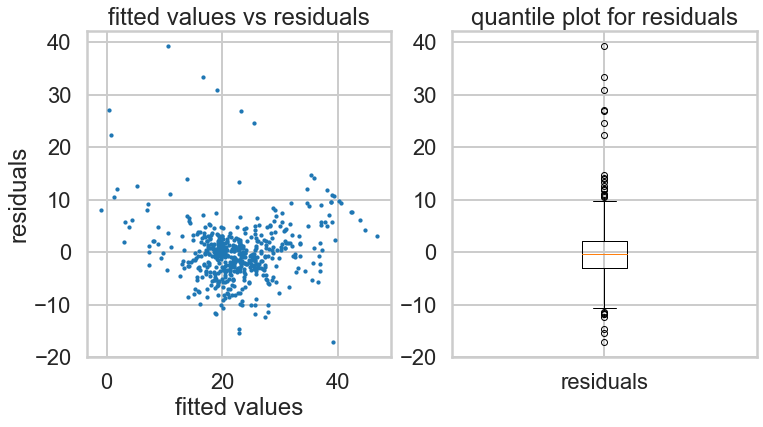

In [160]:
# Your turn.

y_pred = lm3.fittedvalues
Res = bos.PRICE - y_pred
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.scatter(y_pred, Res, s=5)
ax2.boxplot(Res)
ax1.set(title='fitted values vs residuals', xlabel='fitted values', ylabel='residuals')
ax2.set(title='quantile plot for residuals')
ax2.set_xticklabels(['residuals'])
plt.show()


<b>Observations from the plots:</b><br>
The residual plot does not look completely random. One can observe a V shaped pattern in the fitted vs residuals plot.<br>
There are outliers in the model. We can see clearly the outliers that correspond to the ceiling effect of the model we observed earlier. They can se seen in a negatively sloped line going across the top right portion of the plot<br>
The box plot shows the presence of these outliers much more clearly.<br>
The median lies close to zero and the min and max near -10 and 10 respectively.

<b>Comparison of fitted vs residual and quantile plot of the residuals:</b><br>
Fitted vs residual:<br>
* The presence of patterns can be visually detected.
* Does not give a good sense of outliers in the residuals and hence the data.

Residual quantile plot:<br>
* The present of patterns cannot be detected.
* Gives a good estimation of outliers in the residuals data.

We can see clearly the outliers that correspond to the ceiling effect of the model discussed earlier. They can be seen in a negatively sloped line going across the top right portion of the plot.<br> Other outliers could correspond to strategic location towns which rank low on the values of predictor variables, but still command high prices due to their town location etc. This could also be generalized on the lower end of outliers where despite good values of predictor variables corresponding to a high prices or properties, the actual price of the houses was actually low (Bad locations, historic war locations, other variables not considered present in the data set but not considered in this analysis)

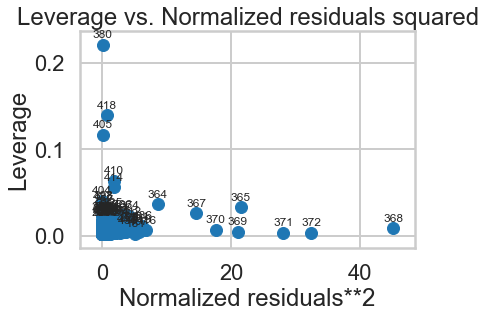

In [226]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(lm3)
plt.show()

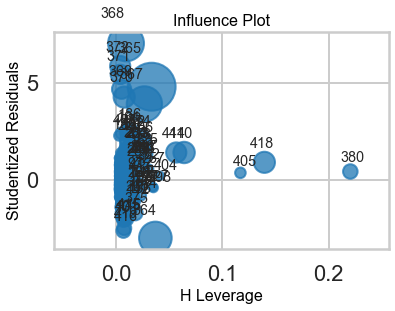

In [227]:
influence_plot(lm3)
plt.show()

In [224]:
inf = lm3.get_influence()
inf_sum = inf.summary_frame()

res = inf_sum.student_resid
lev = inf_sum.hat_diag

# We consider a residual value of greater than 2 to be concerning.
# A leverage value of (2k+2)/n where k is the number of features and n is the number of observations
res = res[abs(res) > 2]
lev = lev[abs(lev) > (2*3+2)/506]

# Removing outliers (high residuals) and high leverage observations from the data
rem_list = list(set(res.index.values.tolist() + lev.index.values.tolist()))
bos_new = bos.drop(rem_list)
print(bos_new)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [228]:
bos_new = bos.drop(high_inf.index)
lm3_new = ols('PRICE ~ CRIM + RM + PTRATIO',bos_new).fit()
print(lm3_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     286.1
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          6.50e-108
Time:                        09:39:49   Log-Likelihood:                -1575.5
No. Observations:                 502   AIC:                             3159.
Df Residuals:                     498   BIC:                             3176.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.2470      3.933     -2.351      0.0

In [230]:
#Printing the old summary (without removing outliers and high leverage points) for reference.
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           6.15e-98
Time:                        09:46:59   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

We can observed a marked improvement in the model as:<br>
1. The value of R2 increased from 0.594 to 0.633 - Indicating a better expression of variance of the response variable by the predictor variables.
2. The value of F-statistic increased from 245 to 286 - Indicating that the significance of the model has increased.
3. The value of AIC has reduced from 3232 to 3159 - This also indicates a better fit to the model.